Q3. (To Explore Decision Tree Algorithm )
For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing


In [33]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [34]:
#reading dataset
df = pd.read_csv(r'C:\Users\mypc\Downloads\Iris (2).csv')

In [35]:
#checking null values in dataset
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [36]:
#checking datatypes
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [37]:
#to check statistical data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


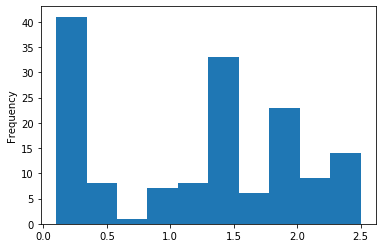

In [38]:
#plotting graph for petalwidth
df['PetalWidthCm'].plot.hist()
plt.show()

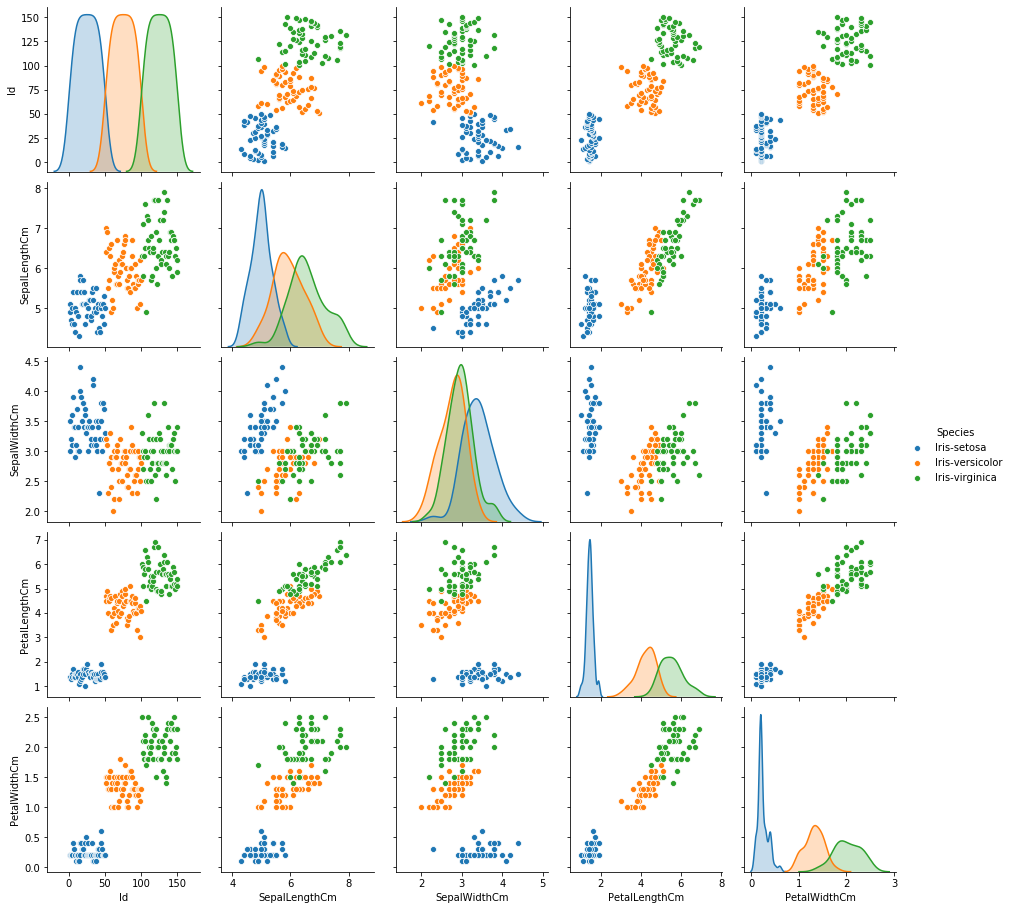

In [39]:
#plotting between pairs of features
sns.pairplot(df, hue='Species')

In [40]:
#splitting dataset 
all_inputs = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
all_classes = df['Species'].values

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)


In [41]:
#using decision tree classifier 
dtc = DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)
dtc.score(test_inputs, test_classes)

0.9555555555555556

In [42]:
#using graphviz for plotting graph
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus



In [43]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [44]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

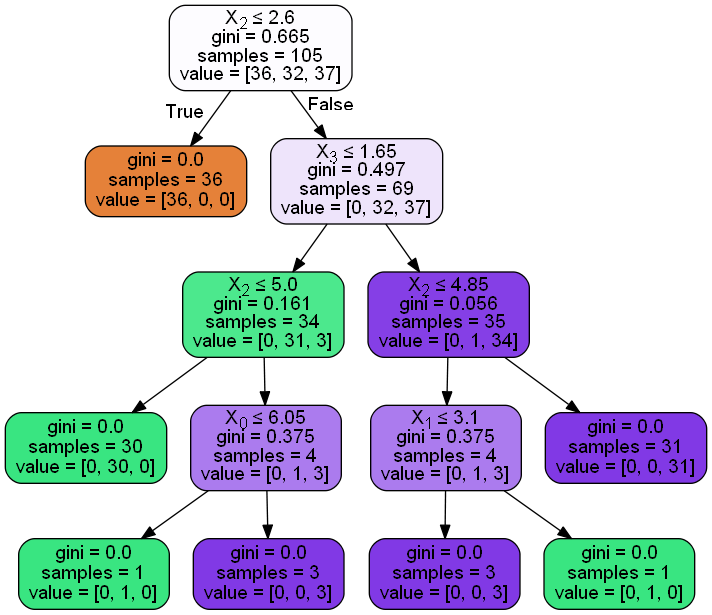

In [45]:
#plotting graph for given algorithm
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())